Recuerden poner la api_key de su cuenta acá abajo

In [32]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

openai.api_key = "sk-"

<b> Text Completion </b>

In [41]:
prompt = "Convertí los títulos de película en emojis.\n\nVolver al futuro: 👨👴🚗🕒 \nBatman: 🤵🦇 \nTransformers: 🚗🤖 \nParanoia:"

response = openai.Completion.create(
    
  model = "text-davinci-003",
  prompt = prompt,
  temperature = 0,
  max_tokens = 60,
  frequency_penalty = 0,
  presence_penalty = 0,
  stop = ["."]
)

print(prompt + response['choices'][0]['text'])

Convertí los títulos de película en emojis.

Volver al futuro: 👨👴🚗🕒 
Batman: 🤵🦇 
Transformers: 🚗🤖 
Paranoia: 🤫🔍


<b> Chat Completion </b>

In [43]:
text_to_translate = "This is a demo about OpenAI's Chat Completion."

response = openai.ChatCompletion.create(
    
  model = "gpt-3.5-turbo",
  messages = [
        {"role": "system", "content": "You are a helpful translator from English to Spanish"},
        {"role": "user", "content": "Translate this to Spanish: " + text_to_translate}
  ]
)

print(response['choices'][0]['message']['content'])

Esto es una demostración acerca de OpenAI's Chat Completion.


<b> Embeddings </b>

In [25]:
response = openai.Embedding.create(

    input = ["hola"], 
    model = 'text-embedding-ada-002'
)

print(response['data'][0]['embedding'])

[-0.03501248359680176, -0.003230631584301591, -0.028199385851621628, -0.028541356325149536, -0.028646577149629593, 0.005211757030338049, -0.03111928515136242, 0.0003693031321745366, -0.011949227191507816, -0.01596737653017044, 0.022333282977342606, -0.006388923618942499, -0.011442847549915314, 0.003102392889559269, -0.005349860060960054, -0.005928578786551952, 0.015033534727990627, -0.016809148713946342, 0.021688800305128098, 0.0019318026024848223, -0.025923969224095345, 0.01433644164353609, -0.0014878991059958935, -0.036301448941230774, -0.012304349802434444, -0.013639348559081554, 0.02780480496585369, -0.01196895632892847, 0.009956592693924904, -0.03603839501738548, -0.0008208106155507267, 0.005073653534054756, -0.020649736747145653, -0.009417332708835602, -0.001182098756544292, -0.02276732213795185, 0.0038636052049696445, -0.021504662930965424, 0.020886486396193504, 0.005632643122226, 0.013520974665880203, -0.009502825327217579, -0.007220831699669361, -0.007404969539493322, -0.01069

Correlación entre embeddings de palabras del inglés

In [26]:
count = 20

def get_embeddings(inputs):
    return [openai.Embedding.create(input = inputs, model = 'text-embedding-ada-002')['data'][i]['embedding'] for i in range(len(inputs))]

Leemos los datos del .csv

In [44]:
df = pd.read_csv("data/4000-most-common-english-words.csv").sample(count).reset_index(drop = True)
df['embedding'] = get_embeddings(df.word.to_list())

Calculamos la matriz de similitud entre embeddings

In [45]:
similarity_matrix = np.zeros((count, count))

for i in range(count):
    for j in range(count):

        similarity_matrix[i][j] = np.dot(df['embedding'][i], df['embedding'][j])

Plot de los resultados

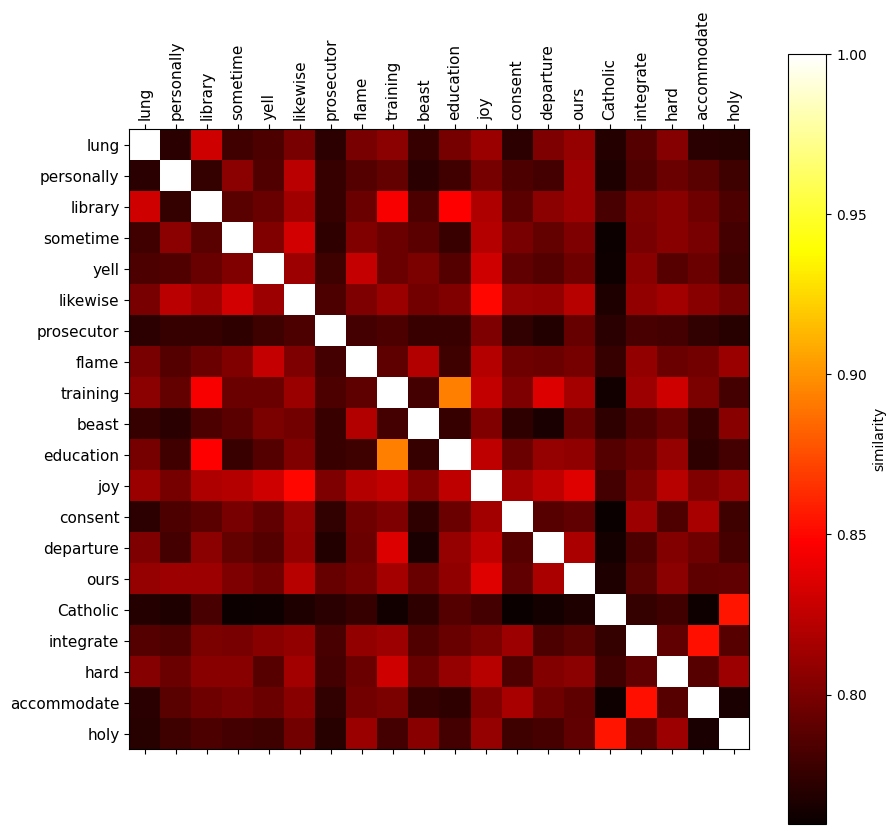

In [46]:
fig, ax = plt.subplots(figsize = (10,10))

im = ax.matshow(similarity_matrix, cmap = 'hot')

ax.set_xticks(ticks = range(count), labels = df.word.to_list(), rotation = 'vertical')
ax.set_yticks(ticks = range(count), labels = df.word.to_list())

ax.tick_params(axis = 'both', labelsize = 11)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("similarity")